<p style="background-color:#8a4baf;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>ANN - IRIS Flower Classification</b></p>

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp)

<p style="color:  #8a4baf; font-size: 15px; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">The Iris dataset is a well-known and frequently used benchmark in machine learning and statistics. It is a classic dataset containing a collection of measurements of various features of three different iris flower species: Setosa, Versicolor, and Virginica. 
This dataset serves as a foundational example for exploring and applying data analysis, classification, and pattern recognition techniques. With its simplicity and clarity, the Iris dataset continues to be a milestone for both beginners and experienced practitioners, providing insights into data exploration and algorithm evaluation.</p


# <font color='#8a4baf'> <b>Importing Libraries</b><font color='black'>  

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# <font color='#8a4baf'> <b>Loading The Dataset</b><font color='black'>  

In [20]:
df = pd.read_csv("iris.csv")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# <font color='#8a4baf'> <b>Understanding The Data & EDA</b><font color='black'>  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
df.describe()       

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# Checking out statistical information on our target variable

df.groupby("species").agg(["min","max","std","mean"]) 

sepal_length                       sepal_width                 \
                    min  max       std   mean         min  max       std   
species                                                                    
setosa              4.3  5.8  0.352490  5.006         2.3  4.4  0.379064   
versicolor          4.9  7.0  0.516171  5.936         2.0  3.4  0.313798   
virginica           4.9  7.9  0.635880  6.588         2.2  3.8  0.322497   

                  petal_length                       petal_width       \
             mean          min  max       std   mean         min  max   
species                                                                 
setosa      3.428          1.0  1.9  0.173664  1.462         0.1  0.6   
versicolor  2.770          3.0  5.1  0.469911  4.260         1.0  1.8   
virginica   2.974          4.5  6.9  0.551895  5.552         1.4  2.5   

                             
                 std   mean  
species                      
setosa      0.105386  0.246  
versicolor  0.197753  1.326  
virginica   0.274650  2.026

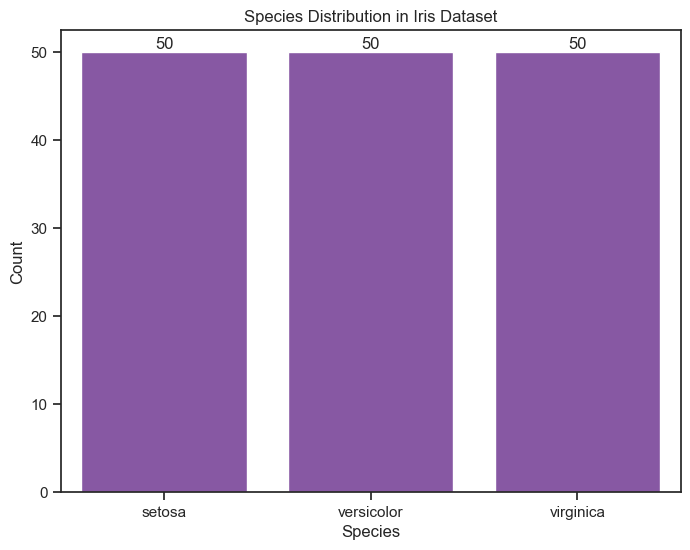

In [42]:
# Distribution of values ​​in the target variable

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='species', color='#8a4baf')
ax.bar_label(ax.containers[0])
plt.title('Species Distribution in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

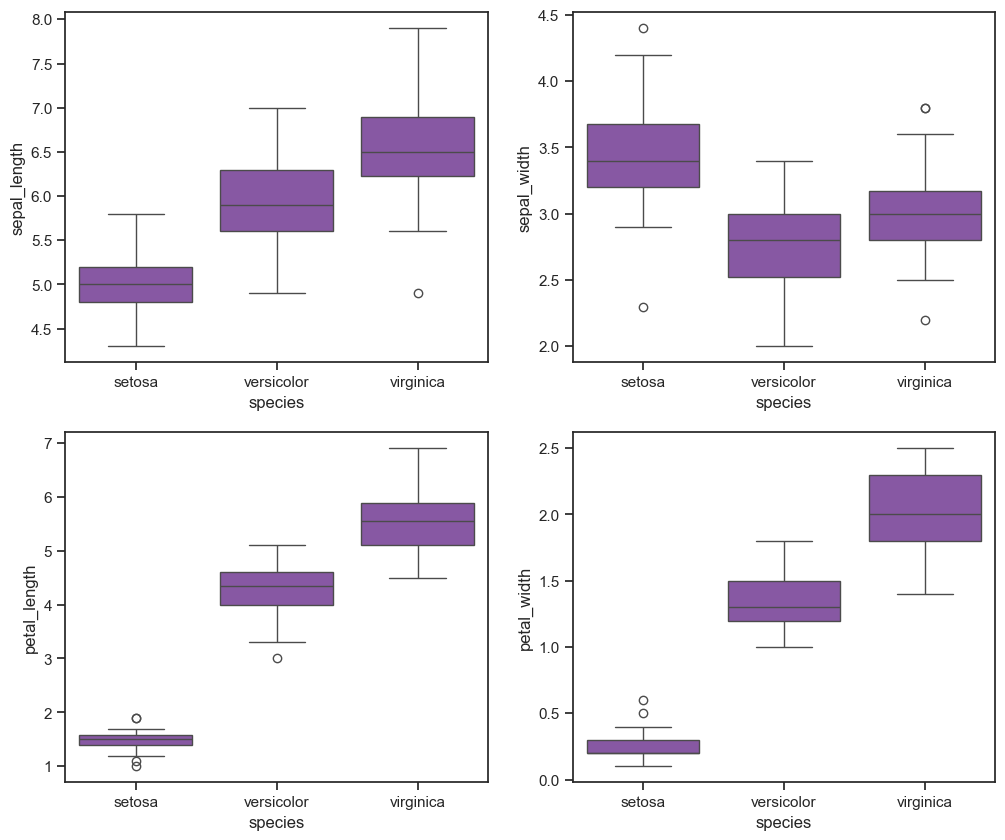

In [40]:
# Checking out outliers

sns.set(style = "ticks")
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)                                                 
sns.boxplot(x = "species", y = "sepal_length", data = df, color='#8a4baf')
plt.subplot(2,2,2)
sns.boxplot(x = "species", y = "sepal_width", data = df, color='#8a4baf')
plt.subplot(2,2,3)
sns.boxplot(x = "species", y = "petal_length", data = df, color='#8a4baf')
plt.subplot(2,2,4)
sns.boxplot(x = "species", y = "petal_width", data = df, color='#8a4baf')
plt.show()

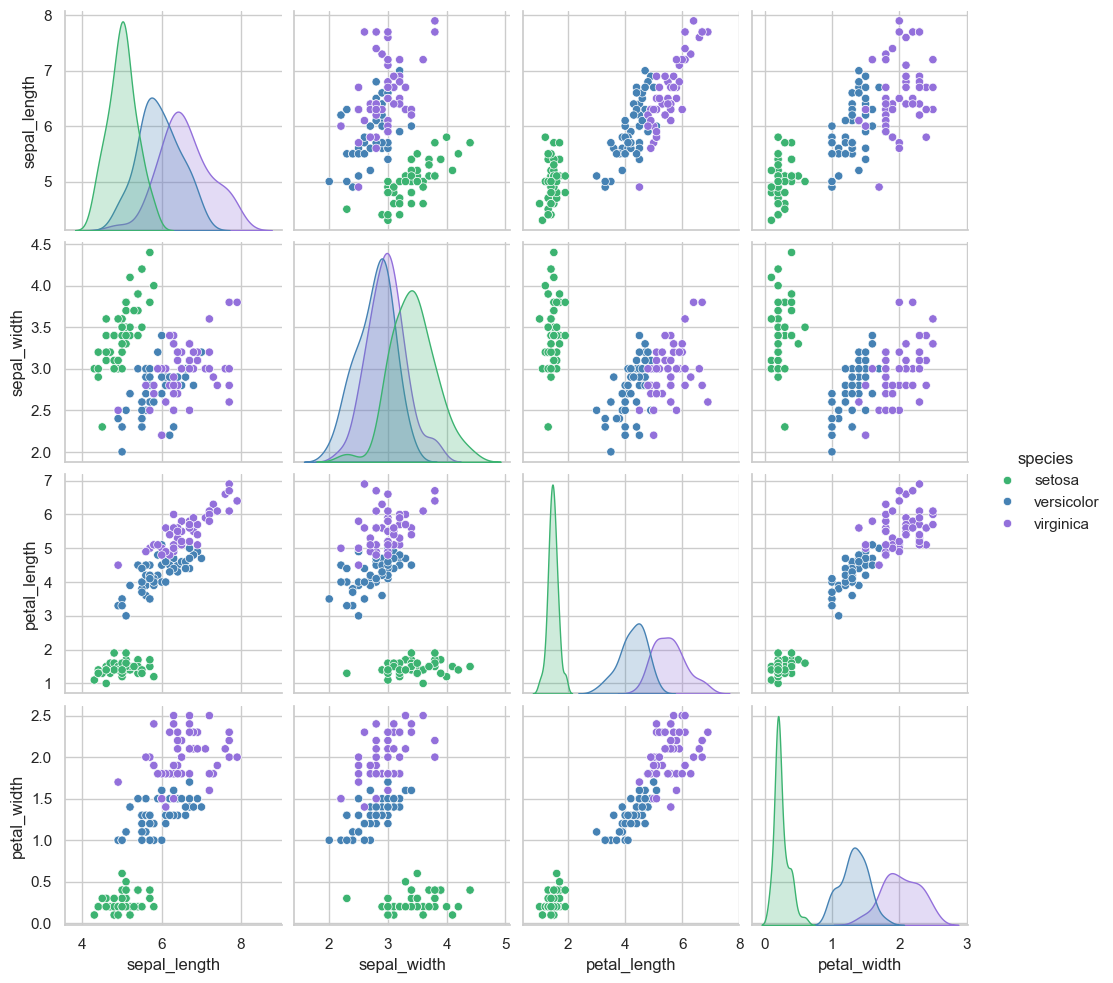

In [54]:
sns.set(style="whitegrid")

# Plot the distributions of features for each species
sns.pairplot(df, hue='species', diag_kind="kde", palette=["mediumseagreen", "steelblue", "mediumpurple"])
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


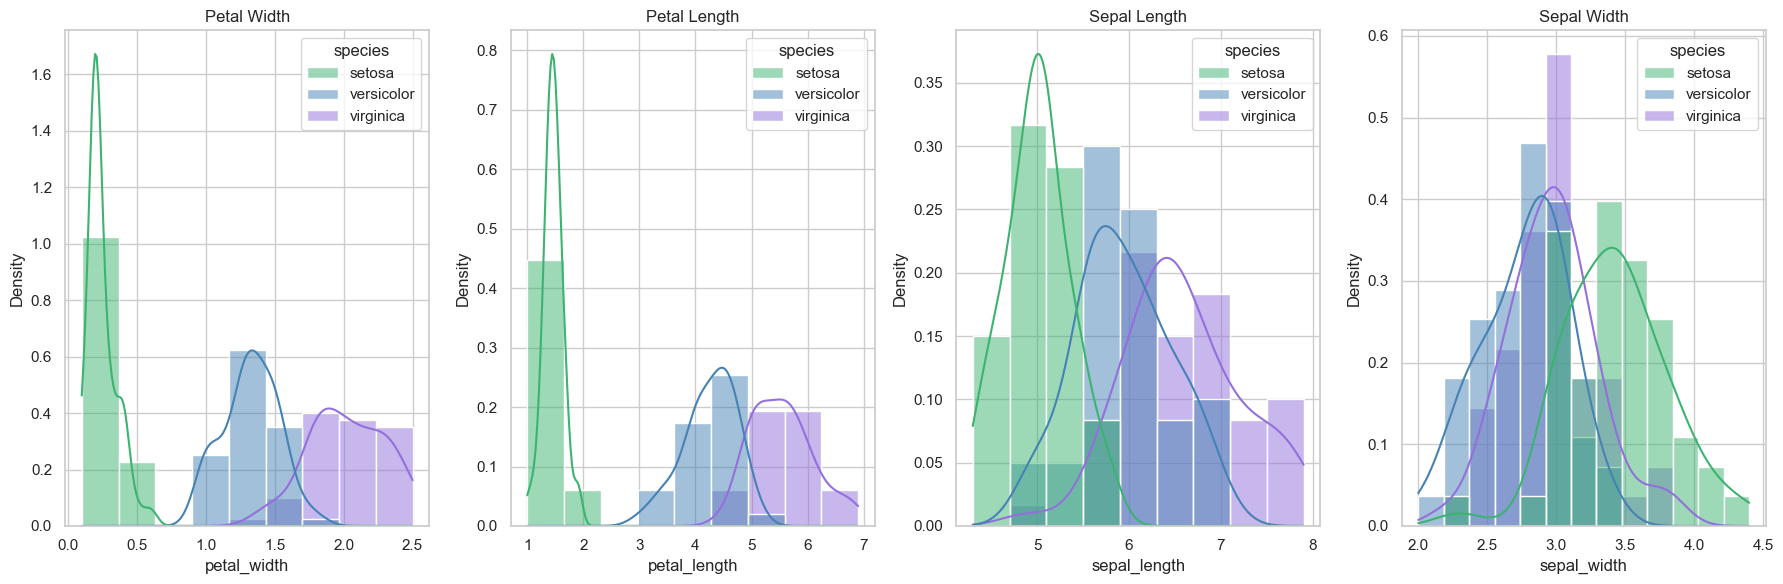

In [58]:
plt.figure(figsize=(18, 6))

# Petal width
plt.subplot(1, 4, 1)
sns.histplot(data=df, x="petal_width", hue="species", stat="density", palette=["mediumseagreen", "steelblue", "mediumpurple"], kde=True)
plt.title("Petal Width")

# Petal length
plt.subplot(1, 4, 2)
sns.histplot(data=df, x="petal_length", hue="species", stat="density", palette=["mediumseagreen", "steelblue", "mediumpurple"], kde=True)
plt.title("Petal Length")

# Sepal length
plt.subplot(1, 4, 3)
sns.histplot(data=df, x="sepal_length", hue="species", stat="density", palette=["mediumseagreen", "steelblue", "mediumpurple"], kde=True)
plt.title("Sepal Length")

# Sepal width
plt.subplot(1, 4, 4)
sns.histplot(data=df, x="sepal_width", hue="species", stat="density", palette=["mediumseagreen", "steelblue", "mediumpurple"], kde=True)
plt.title("Sepal Width")

plt.tight_layout()
plt.show()

**Results**:

* We have four numerical columns, while the only categorical column we aim to analyze is the flower species.

* The dataset is balanced, meaning there are equal records for all three species.

* There are no missing values in our dataset.

* From the boxplot, we can see that there is no significant outlier issue.

* There is a strong correlation between petal width and petal length.

* The Setosa species is the easiest to distinguish due to its small size.

* Versicolor and Virginica species are often confused, and sometimes it is difficult to separate them. However, the Versicolor species generally has more average dimensions, whereas the Virginica species tendsto be larger.


In [62]:
# Converting target variable to numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
le.fit_transform(df["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
df["species"] = le.fit_transform(df["species"])

In [68]:
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

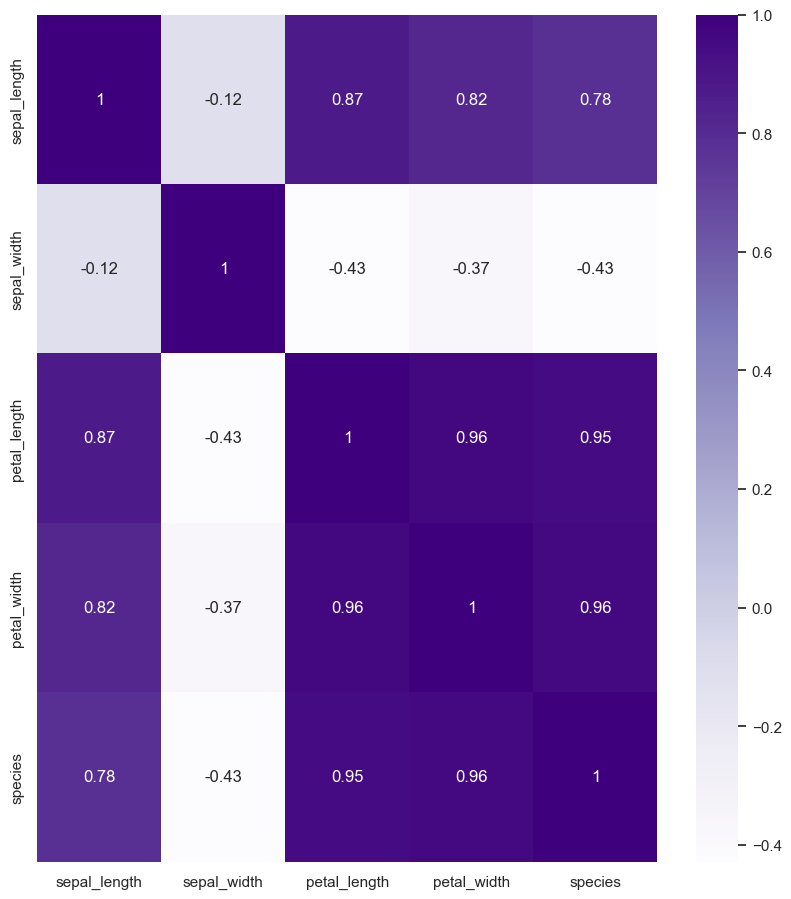

In [70]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,11))
sns.heatmap(correlation_matrix, annot = True, cmap = "Purples")
plt.show()

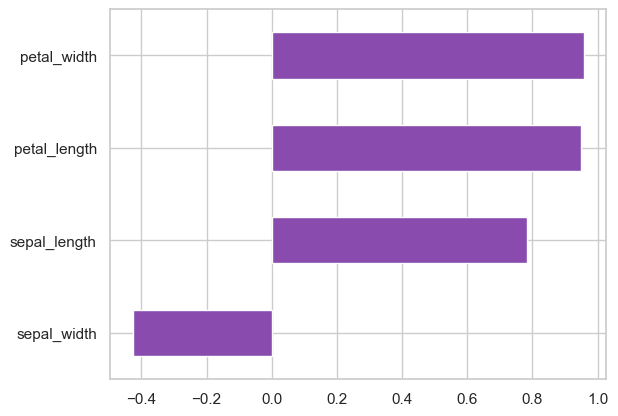

In [72]:
# correlation of target variable with features after numerical conversion

df.corr()['species'][:-1].sort_values().plot.barh(color='#8a4baf');

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# <font color='#8a4baf'> <b>Train | Test Split</b><font color='black'>  

In [86]:
X = df .drop("species", axis = 1)
y = df["species"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <font color='#8a4baf'> <b>ANN Model</b><font color='black'>  

**IMPORTANT:**

* If the target variables in your dataset are represented by class numbers, meaning each class is represented by a number, it would be more appropriate to use the **sparse_categorical_crossentropy** loss function. If one-hot encoding is used, then **categorical_crossentropy** is preferred. Due to the state of our target variable, we will prefer the sparse_categorical_crossentropy loss function. 
* If we were to use categorical_crossentropy in our model, we would first need to **import from tensorflow.keras.utils import to_categorical** and then apply **y_train_encoded = to_categorical(y_train)** and **y_test_encoded = to_categorical(y_test)** on our target variabls.


In [94]:
# Build the model
model = Sequential([
    Dense(units=10, activation="relu"),
    Dense(units=10, activation="relu"),    # When the number of neurons is reduced, the number of epochs must be increased.
    Dense(units=3, activation="softmax")
])

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=5, epochs=200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5617 - loss: 1.0637 - val_accuracy: 0.7000 - val_loss: 1.0256
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7507 - loss: 1.0251 - val_accuracy: 0.7000 - val_loss: 0.9878
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5961 - loss: 1.0147 - val_accuracy: 0.7000 - val_loss: 0.9435
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6451 - loss: 0.9543 - val_accuracy: 0.7000 - val_loss: 0.8900
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6811 - loss: 0.8967 - val_accuracy: 0.7000 - val_loss: 0.8324
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6616 - loss: 0.8369 - val_accuracy: 0.7000 - val_loss: 0.7717
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6319 - loss: 0.8077 - val_accuracy: 0.7000 - val_loss: 0.7100
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5923 - loss: 0.7555 - val_accuracy: 0.

In [96]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int32

In [98]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (5, 10)                     │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (5, 10)                     │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (5, 3)                      │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

* Since the data is not in a large and complex form, Dropout and Early stopping methods were not applied.

In [100]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [102]:
eval_metric(model, X_train, y_train, X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Test Set:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Train Set:
[[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



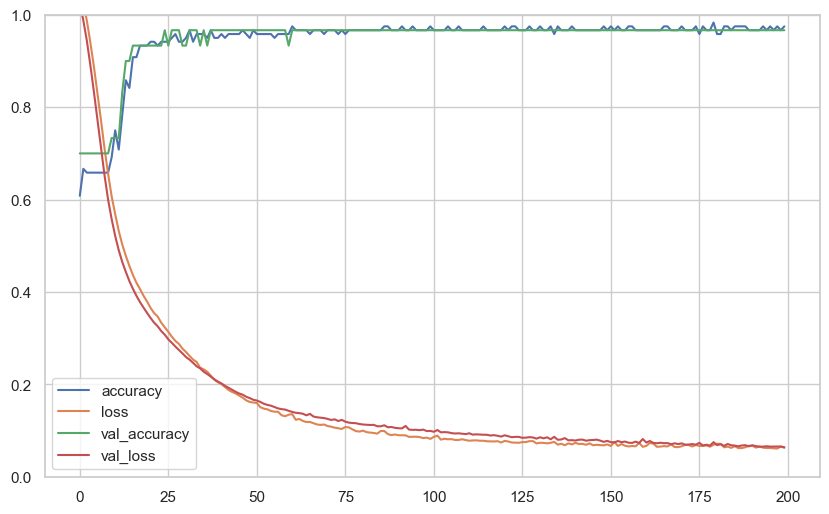

In [104]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Accuracy during Training :
------------------------------------


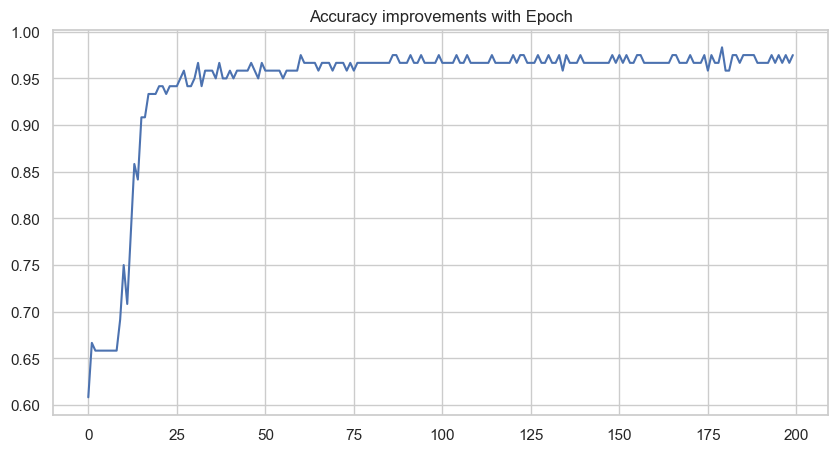

In [106]:
# Just looking at Accuracy change

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# <font color='#8a4baf'> <b>Final Model & Model Deployment & Prediction</b><font color='black'>  

In [108]:
X.shape

(150, 4)

In [110]:
y.shape

(150,)

In [112]:
scaler = MinMaxScaler().fit(X)

In [114]:
# Saving MinMaxScaler operation
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [116]:
X_scaled = scaler.transform(X)

In [118]:
final_model = Sequential([
            Dense(units=10, activation="relu"),
            Dense(units=10, activation="relu"),
            Dense(units=3, activation="softmax")
    ])

opt = Adam(learning_rate=0.001)

final_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

final_model.fit(x=X_scaled, y=y, batch_size=5, epochs=200) 

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2149 - loss: 1.1052
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2683 - loss: 1.0796 
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4908 - loss: 1.0467
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6665 - loss: 1.0119
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7313 - loss: 0.9774
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 0.9490
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6715 - loss: 0.8672
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6138 - loss: 0.8253
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6727 - loss: 0.7474
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6171 - loss: 0.7206
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6511 - loss: 0.6452
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

In [120]:
# Saving the model as h5 file

final_model.save('final_model_ANN_iris.h5') 

In [122]:
# Saving the model as keras file

final_model.save('final_model_ANN_iris.keras') 

## <font color='mediumpurple'> <b>Prediction Based on Saved Model</b><font color='black'>

In [124]:
# Creating a sample data manually

my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}

sample_ann = pd.DataFrame(my_dict)
sample_ann

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [126]:
# loading min-max scaler file
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [128]:
sample_scaled = scaler_iris.transform(sample_ann)
sample_scaled

array([[0.05555556, 0.08333333, 0.05084746, 0.04166667],
       [0.41666667, 0.41666667, 0.55932203, 0.5       ],
       [0.88888889, 0.91666667, 0.93220339, 0.91666667]])

In [130]:
# loading the previously trained model

from tensorflow.keras.models import load_model

In [132]:
final_model = load_model('final_model_ANN_iris.keras')

C:\Users\refia\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [134]:
final_model.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[9.9785066e-01, 2.1475081e-03, 1.9318175e-06],
       [7.9152815e-05, 9.9854159e-01, 1.3792230e-03],
       [1.7131267e-08, 1.5647084e-03, 9.9843532e-01]], dtype=float32)

In [136]:
y_pred_probabilities = final_model.predict(sample_scaled)
y_pred = y_pred_probabilities.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [138]:
sample_ann["pred"] = y_pred
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred
0,4.5,2.2,1.3,0.2,0
1,5.8,3.0,4.3,1.3,1
2,7.5,4.2,6.5,2.3,2


In [140]:
predictions = final_model.predict(sample_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [142]:
normalized_predictions

array([[0.57532924, 0.21256322, 0.21210761],
       [0.2120708 , 0.57558244, 0.21234669],
       [0.2120622 , 0.21239427, 0.5755435 ]], dtype=float32)

In [144]:
sample_ann["pred_proba_setosa"] = normalized_predictions[:,0]
sample_ann["pred_proba_versicolor"] = normalized_predictions[:,1]
sample_ann["pred_proba_virginica"] = normalized_predictions[:,2]
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.575329,0.212563,0.212108
1,5.8,3.0,4.3,1.3,1,0.212071,0.575582,0.212347
2,7.5,4.2,6.5,2.3,2,0.212062,0.212394,0.575544


<p style="background-color:#8a4baf;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>